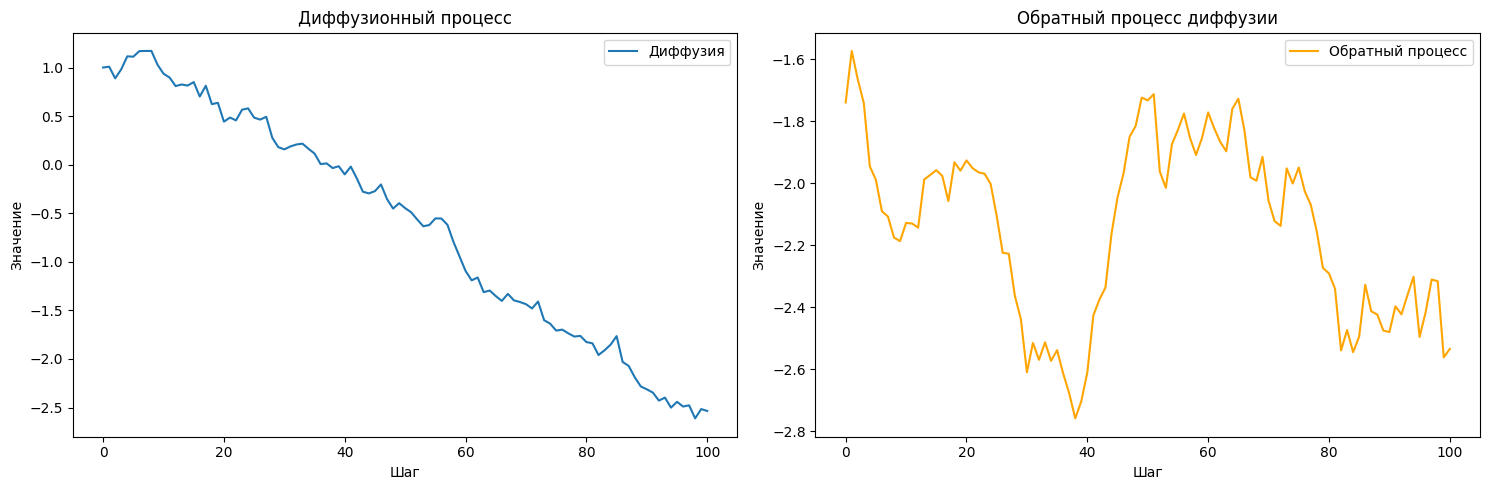

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
initial_value = 1.0  # Начальное значение
steps = 100  # Количество шагов
sigma = 0.1  # Стандартное отклонение шума

# Инициализация массивов
diffusion_values = np.zeros(steps + 1)  # Для диффузионного процесса
reverse_values = np.zeros(steps + 1)  # Для обратного процесса

diffusion_values[0] = initial_value

# Диффузионный процесс
for i in range(1, steps + 1):
    diffusion_values[i] = diffusion_values[i - 1] + np.random.normal(0, sigma)

# Обратный процесс
reverse_values[-1] = diffusion_values[-1]  # Начинаем с последнего значения диффузионного процесса

for i in range(steps - 1, -1, -1):
    reverse_values[i] = reverse_values[i + 1] - np.random.normal(0, sigma)

# Визуализация
plt.figure(figsize=(15, 5))

# Диффузионный процесс
plt.subplot(1, 2, 1)
plt.plot(diffusion_values, label='Диффузия')
plt.title('Диффузионный процесс')
plt.xlabel('Шаг')
plt.ylabel('Значение')
plt.legend()

# Обратный процесс
plt.subplot(1, 2, 2)
plt.plot(reverse_values, label='Обратный процесс', color='orange')
plt.title('Обратный процесс диффузии')
plt.xlabel('Шаг')
plt.ylabel('Значение')
plt.legend()

plt.tight_layout()
plt.show()


In [51]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

class DiffusionModel(nn.Module):
    def __init__(self, data_dim):
        super(DiffusionModel, self).__init__()
        self.linear = nn.Linear(data_dim, data_dim)

    def forward(self, x, noise):
        return self.linear(x + noise)

def train_diffusion_model(model, data, epochs=10, learning_rate=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        for i in range(data.shape[0]):
            noisy_data = data[i] + np.random.normal(0, 1, data[i].shape)
            noisy_data = torch.tensor(noisy_data, dtype=torch.float32)
            optimizer.zero_grad()
            output = model(noisy_data, noise=torch.tensor(np.random.normal(0, 1, data[i].shape), dtype=torch.float32))
            loss = criterion(output, torch.tensor(data[i], dtype=torch.float32))
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

# Пример использования
data_dim = 100  # Размерность данных
model = DiffusionModel(data_dim)
data = np.random.rand(100, data_dim)  # Пример данных
train_diffusion_model(model, data)


Epoch [1/10], Loss: 0.4821932911872864
Epoch [2/10], Loss: 0.5062198042869568
Epoch [3/10], Loss: 0.5797962546348572
Epoch [4/10], Loss: 0.39063945412635803
Epoch [5/10], Loss: 0.27613282203674316
Epoch [6/10], Loss: 0.21696296334266663
Epoch [7/10], Loss: 0.17162683606147766
Epoch [8/10], Loss: 0.1738058626651764
Epoch [9/10], Loss: 0.13469211757183075
Epoch [10/10], Loss: 0.12238631397485733


## Стохастического Градиентного Ланжевеновского Спуска (SGLD)

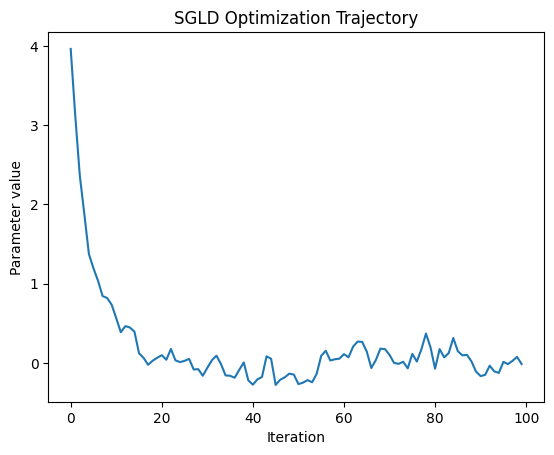

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Целевая функция (например, квадратичная функция потерь)
def loss_function(x):
    return x**2

# Производная целевой функции
def gradient(x):
    return 2 * x

# Параметры SGLD
learning_rate = 0.1
num_iterations = 100
noise_scale = 0.1  # Масштаб шума

# Инициализация
x = 5  # Начальное значение параметра
trajectory = []  # Для хранения истории параметра

# SGLD
for i in range(num_iterations):
    grad = gradient(x)
    noise = np.random.normal(scale=noise_scale)
    x -= learning_rate * grad + noise  # Обновление с шумом
    trajectory.append(x)

# Визуализация
plt.plot(trajectory)
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.title('SGLD Optimization Trajectory')
plt.show()